In [154]:
# later: pip install -r requirements.txt
! pip install "pandas == 2.2"
! pip install seaborn
! pip install scikit-learn


USE F1 score


In [155]:
# import libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

# Data Preprocessing

In [156]:
data = "data/heart.csv"

In [157]:
df = pd.read_csv(data)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [158]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [159]:
# check how many unique elements the dataset contains in each column  
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# Exploratory Data Analysis

/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_73392/2150340137.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette=colors)


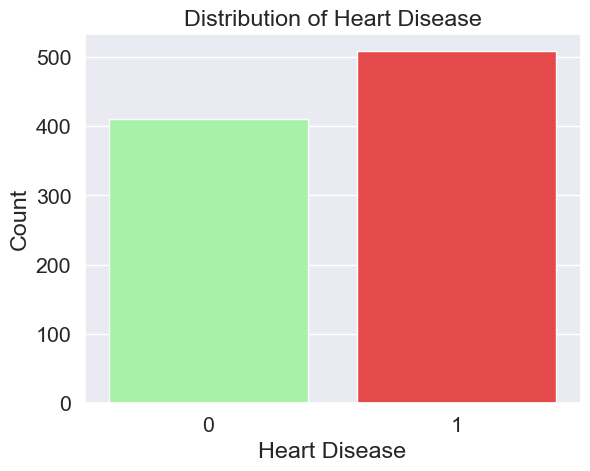

In [160]:
# Visualize disease Distribution in the dataset

colors = ["#9aff9a", "#ff3030"]

sns.countplot(x='HeartDisease', data=df, palette=colors)

plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

plt.show()

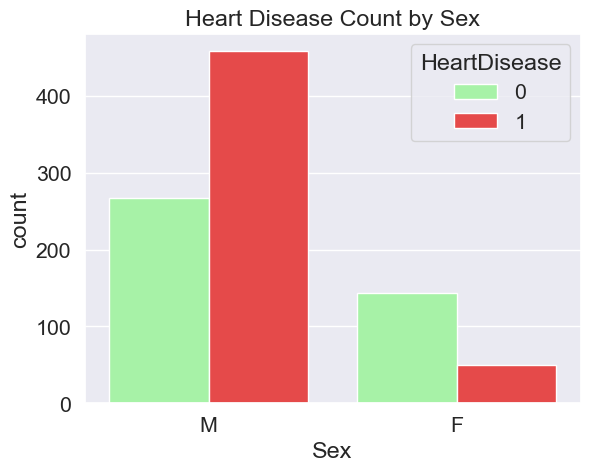

In [161]:
sns.countplot(x='Sex', hue='HeartDisease', data=df, palette=['#9aff9a', '#ff3030'])

plt.xlabel("Sex")
plt.title("Heart Disease Count by Sex")

plt.show()

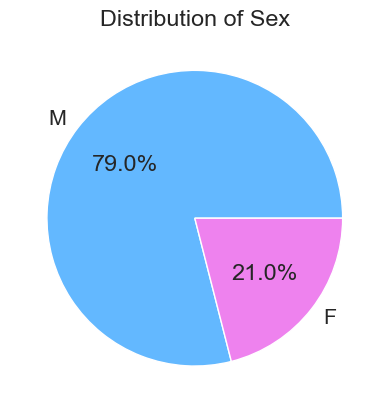

In [162]:
sizes = df["Sex"].value_counts()
colors = ['#63b8ff', '#ee82ee']

plt.title("Distribution of Sex")

plt.pie(sizes, labels=sizes.index, colors=colors, autopct='%1.1f%%')

plt.show()



/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_73392/4294133684.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])  # Rote Farbe
/var/folders/3l/_xvv3581559_krvl1r82px5w0000gn/T/ipykernel_73392/4294133684.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff'])  # Grüne Farbe


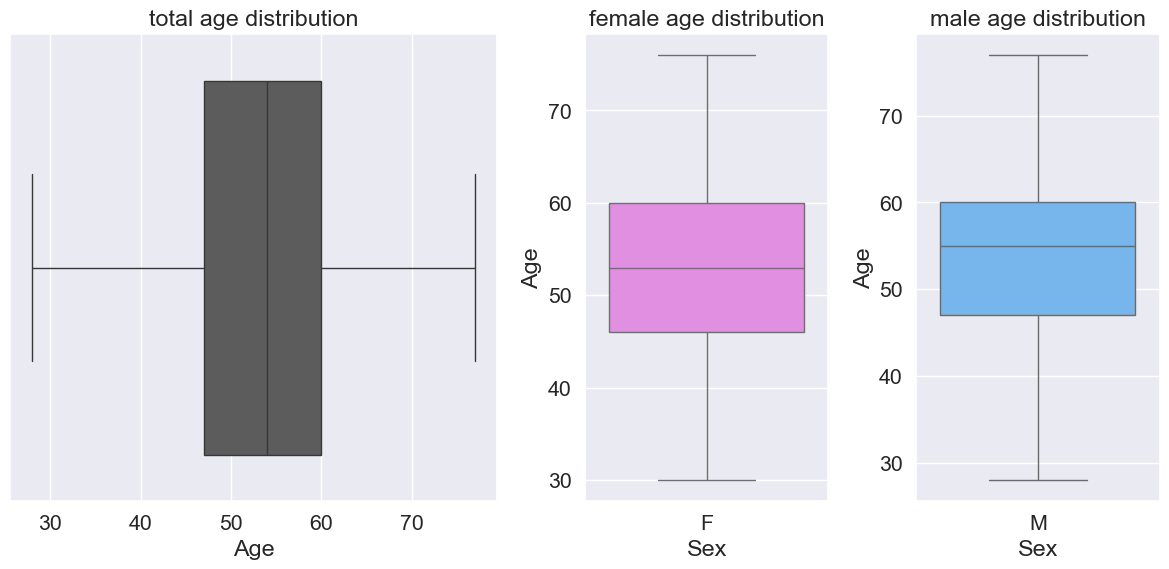

In [163]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 1, 1])

# total age distribution
ax1 = fig.add_subplot(gs[0])
sns.boxplot(x=df["Age"], ax=ax1, color='#5c5c5c')
ax1.set_title('total age distribution')

# female age distribution
ax2 = fig.add_subplot(gs[1])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'F'], ax=ax2, palette=['#ee82ee'])  # Rote Farbe
ax2.set_title('female age distribution')

# male age distribution
ax3 = fig.add_subplot(gs[2])
sns.boxplot(x='Sex', y='Age', data=df[df['Sex'] == 'M'], ax=ax3, palette=['#63b8ff'])  # Grüne Farbe
ax3.set_title('male age distribution')

plt.tight_layout()
plt.show()

<Axes: xlabel='ChestPainType', ylabel='count'>

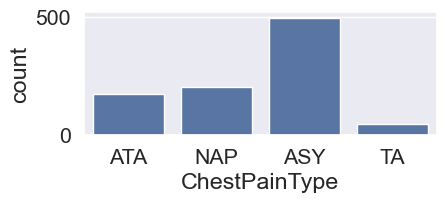

In [164]:
fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(8, 2, width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x=df["ChestPainType"])


# Outlier Detection


In [165]:
'''Outlier Detection'''

'Outlier Detection'

# ML

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [167]:
df_encoded = pd.get_dummies(df, columns=["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])

In [168]:
target = df_encoded["HeartDisease"]
features = df_encoded.drop("HeartDisease", axis=1)

In [169]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1, stratify=target)

In [170]:
target.value_counts() # siehe Visualisierung oben

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [178]:
forest = RandomForestClassifier()
forest.fit(features_train, target_train)

RandomForestClassifier()

In [179]:
target_pred_test = forest.predict(features_test)

In [180]:
accuracy_score(target_test, target_pred_test)

0.8521739130434782

In [175]:
confusion_matrix(target_test, target_pred_test)

array([[ 82,  21],
       [ 10, 117]])

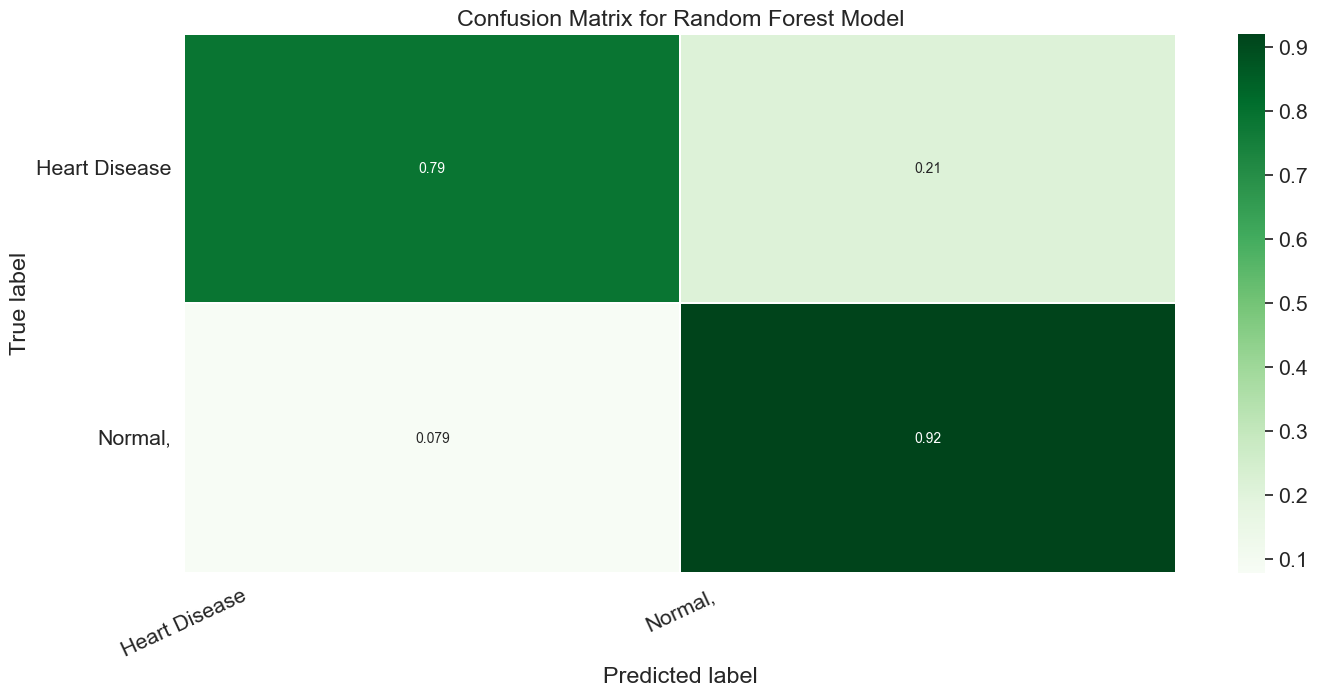

In [176]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(target_test, target_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Heart Disease', 'Normal‚']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [177]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       103
           1       0.84      0.92      0.88       127

    accuracy                           0.86       230
   macro avg       0.87      0.85      0.86       230
weighted avg       0.86      0.86      0.86       230

